In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import sklearn
import matplotlib

matplotlib.rcParams.update({
    'font.size':18,
    'legend.fontsize':20,
    'axes.labelsize':12,
    'figure.titlesize':22,
    'lines.linewidth': 2.5,
    'lines.markersize': 12.0
})
#matplotlib.rcParams
import importlib
import data
importlib.reload(data)
from data import *

# Measures

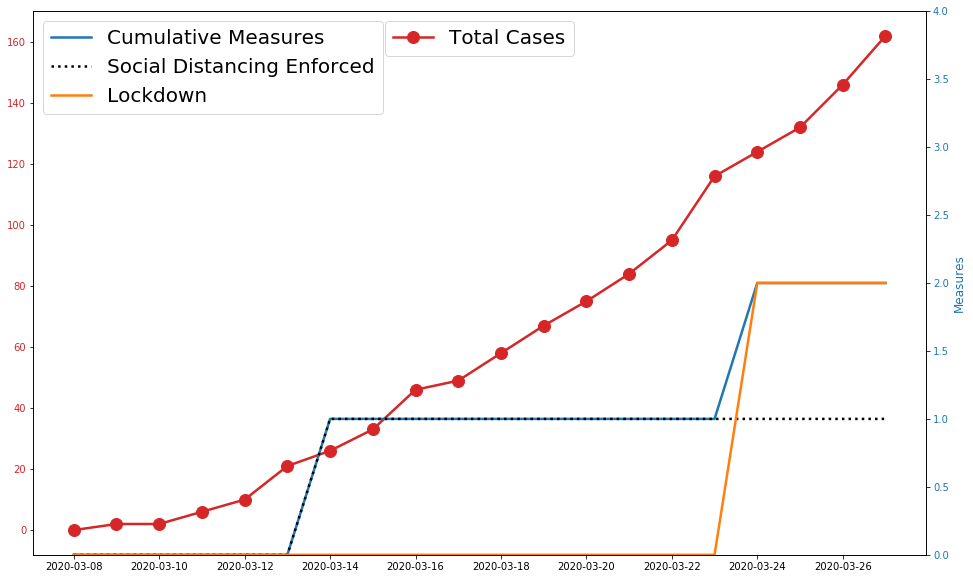

In [2]:
fig, ax1 = plt.subplots(figsize=(16,10))

color = 'tab:red'
ax1.plot(dates, total_cases, 'o-',color=color, label='Total Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper center')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Measures', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, measures, color=color, label='Cumulative Measures')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(dates, social_distancing, 'k:', label='Social Distancing Enforced')
ax2.plot(dates, lockdown, color='tab:orange',label='Lockdown')
ax2.set_ylim([0,4])

ax2.legend(loc='upper left')

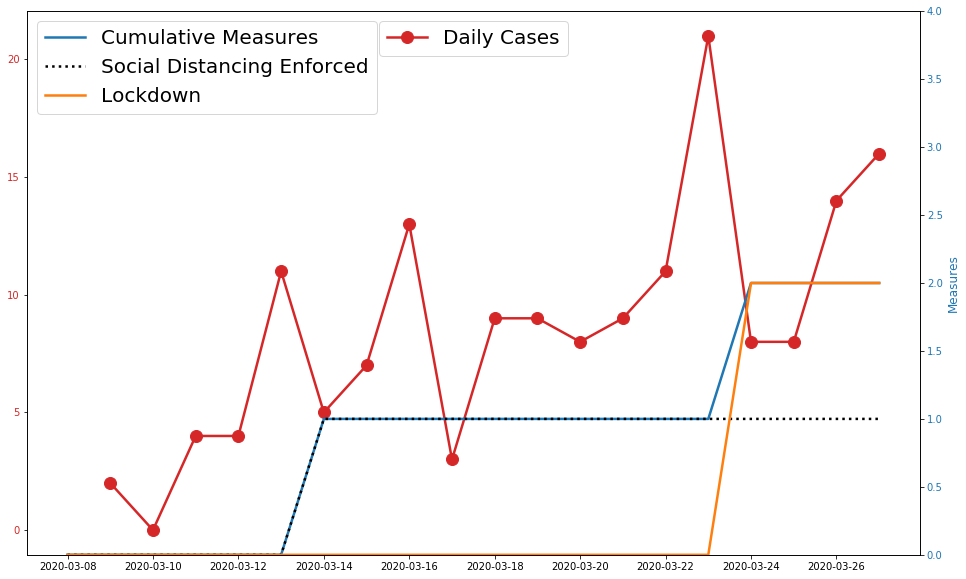

In [3]:
fig, ax1 = plt.subplots(figsize=(16,10))

color = 'tab:red'
ax1.plot(dates[1:], np.diff(total_cases),'o-', color=color, label='Daily Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper center')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Measures', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, measures, color=color, label='Cumulative Measures')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(dates, social_distancing, 'k:', label='Social Distancing Enforced')
ax2.plot(dates, lockdown, color='tab:orange',label='Lockdown')
ax2.set_ylim([0,4])

ax2.legend(loc='upper left')

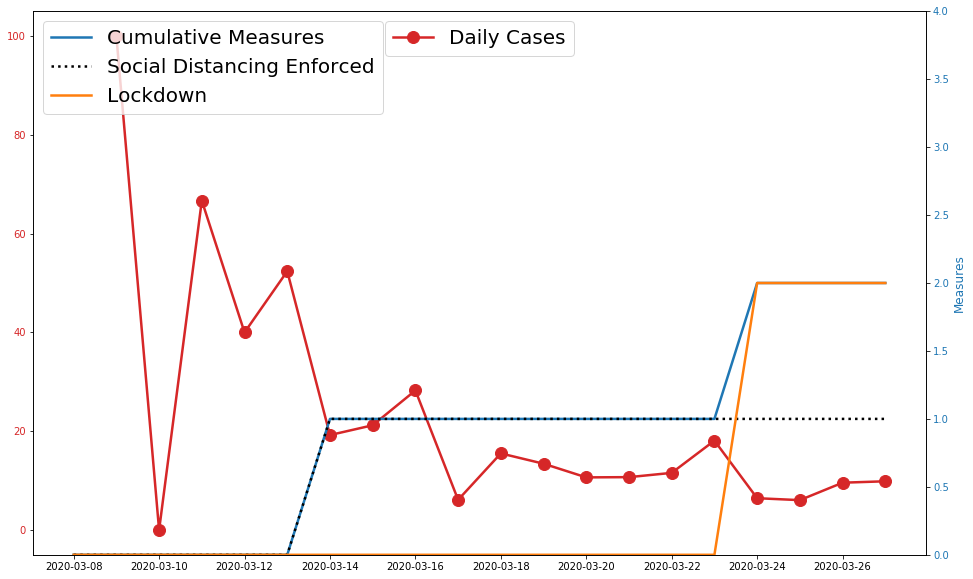

In [4]:
fig, ax1 = plt.subplots(figsize=(16,10))

color = 'tab:red'
ax1.plot(dates[1:], daily_percentage_increase, 'o-', color=color, label='Daily Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper center')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Measures', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, measures, color=color, label='Cumulative Measures')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(dates, social_distancing, 'k:', label='Social Distancing Enforced')
ax2.plot(dates, lockdown, color='tab:orange',label='Lockdown')
ax2.set_ylim([0,4])

ax2.legend(loc='upper left')

# Grangers Causality Test

Both time series must be  stationary to use Granger's causality test. ADF used to check for statioarity

## Stationarity tests

In [23]:
from statsmodels.tsa.stattools import adfuller

print('First vale is the statistic, second is the pvalue, in the brackets are the critical values for the statistic')

print('Stationarity tests for Total Cases\n')
print('Total Cases:\n' + str(adfuller(total_cases)) + '\n')
print('Daily New Cases:\n' + str(adfuller(np.diff(total_cases))) + '\n')
print('Daily Percentage Increase:\n'+ str(adfuller(daily_percentage_increase)) + '\n\n\n')

print('Stationarity tests for measures\n')
print('Measures:\n'+ str(adfuller(measures)) + '\n')
print('Measures Diff:\n'+ str(adfuller(np.diff(measures))) + '\n')
print('Social Distancing:\n'+ str(adfuller(social_distancing)) + '\n')
print('Social Distancing diff:\n'+ str(adfuller(np.diff(social_distancing))) + '\n')
print('Lockdown:\n'+ str(adfuller(lockdown)) + '\n')
print('Lockdown diff:\n'+ str(adfuller(np.diff(lockdown))) + '\n')


First vale is the statistic, second is the pvalue, in the brackets are the critical values for the statistic
Stationarity tests for Total Cases

Total Cases:
(9.500035864995418, 1.0, 8, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 18.692948259812724)

Daily New Cases:
(-0.27858887423621786, 0.9284825229393184, 6, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, 66.26807132807845)

Daily Percentage Increase:
(-5.99452387494606, 1.7141530473296121e-07, 0, 18, {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}, 62.375819069406745)



Stationarity tests for measures

Measures:
(-0.7335637341182331, 0.8378632031126347, 0, 19, {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}, 7.3709544108509775)

Measures Diff:
(-4.535573676110727, 0.00016949688958234322, 0, 18, {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}, 7.680834

/home/markos/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


The daily percentage increase appears to be stationary, as do the daily differences of the measues. 

## Causality Test

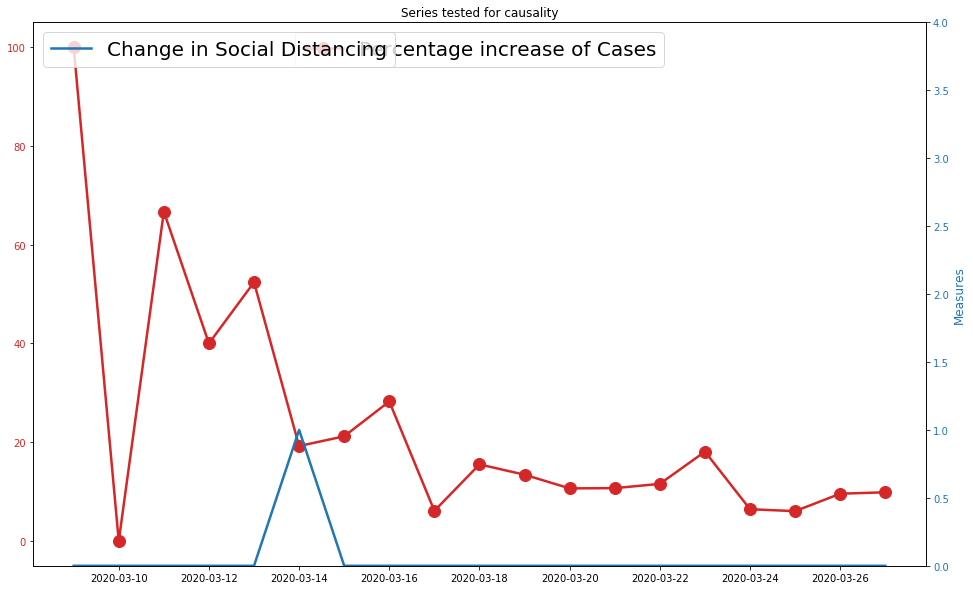

In [6]:
fig, ax1 = plt.subplots(figsize=(16,10))

plt.title('Series tested for causality')
color = 'tab:red'
ax1.plot(dates[1:], daily_percentage_increase, 'o-', color=color, label='Percentage increase of Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper center')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Measures', color=color)  # we already handled the x-label with ax1
ax2.plot(dates[1:], np.diff(social_distancing), color=color, label='Change in Social Distancing')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,4])

ax2.legend(loc='upper left')

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests

social_distancingDict = grangercausalitytests(np.vstack((np.diff(social_distancing), daily_percentage_increase)).T, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1998  , p=0.2906  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=1.4398  , p=0.2302  , df=1
likelihood ratio test: chi2=1.3851  , p=0.2392  , df=1
parameter F test:         F=1.1998  , p=0.2906  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1266  , p=0.1620  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=6.0254  , p=0.0492  , df=2
likelihood ratio test: chi2=5.1575  , p=0.0759  , df=2
parameter F test:         F=2.1266  , p=0.1620  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5099  , p=0.1246  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=13.3859 , p=0.0039  , df=3
likelihood ratio test: chi2=9.7268  , p=0.0210  , df=3
parameter F test:         F=2.5099  , p=0.1246  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=38.3261 , p=0.0002  , df_den

The incubation period of COVID-19 has not yet been accurately found. Some of the estimates  are given below. 

Mean incubation period observed:
* 3.0 days (0 - 24 days range, study based on 1,324 cases)
* 5.2 days (4.1 - 7.0 days range, based on 425 cases).

Mean incubation period observed in travelers from Wuhan:
* 6.4 days (range from 2.1 to 11.1 days).

From the above findings the effects of various measures taken from the goverment will have a visible effect after most of the infected individual at the itme when the measures were brought into effect come out of the incubation period. Based on the first study with a mean incubation pediod of 3 days, the effects from govermental measures will have visible effects after more than 3 days have passed. 

This is reflected in Granger's causality test where there is statistical evidence for causality between the two time series after a lag of 4 and above. 

 *Note:* More data are needed to draw conclusions. According to most experts at least two weeks of data to see the full effect of preventative measures. 
 
 Therefore, there should be little statistical evidence for any causality between the lockdown measures and the percentage increase in new cases.  

In [8]:
lockdownDict = grangercausalitytests(np.vstack((np.diff(lockdown), daily_percentage_increase)).T, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0759  , p=0.7867  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.0911  , p=0.7628  , df=1
likelihood ratio test: chi2=0.0908  , p=0.7631  , df=1
parameter F test:         F=0.0759  , p=0.7867  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1757  , p=0.8410  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=0.4978  , p=0.7796  , df=2
likelihood ratio test: chi2=0.4907  , p=0.7824  , df=2
parameter F test:         F=0.1757  , p=0.8410  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3893  , p=0.7636  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=2.0765  , p=0.5567  , df=3
likelihood ratio test: chi2=1.9524  , p=0.5823  , df=3
parameter F test:         F=0.3893  , p=0.7636  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3107  , p=0.8622  , df_den

## Using Transform $y = \log\left(\frac{n_{t}}{n_{t-1}}\right)$

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


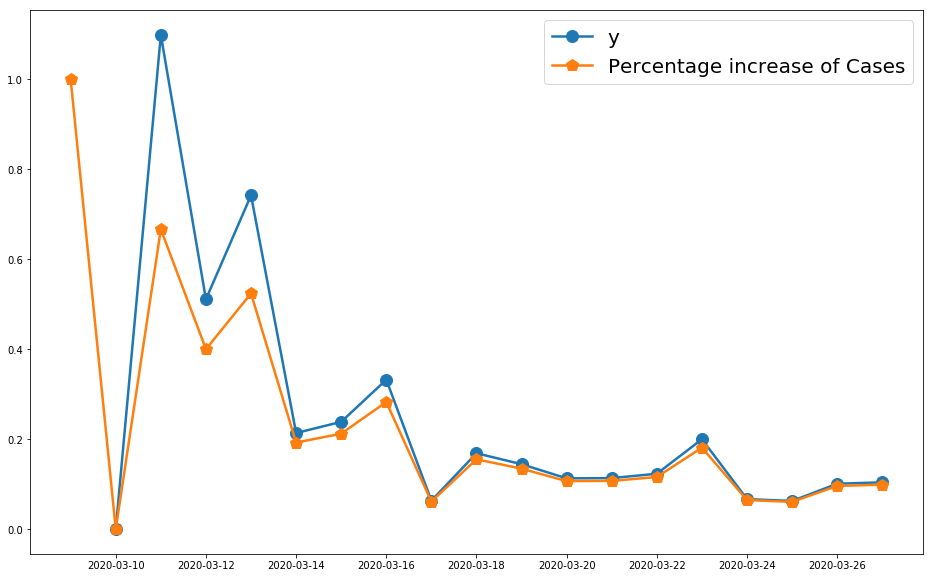

In [9]:
## y = log(n_t) - log(n_t-1)

y = np.diff(np.log(total_cases))

plt.figure(figsize=(16,10))

plt.plot(dates[1:], y, 'o-', label='y')
plt.plot(dates[1:], daily_percentage_increase/100, 'p-', label='Percentage increase of Cases')
plt.legend(loc='best')

Does not appear to be worth testing this and daily percentage increase at the same time

# Spearman rank-order correlation

In [10]:
from scipy.stats import spearmanr

print('Social Distancing and Total cases')
rho, pval = spearmanr(social_distancing, total_cases)
print('Correlation: ' + str(round(rho,2) ))
print('P value: ' + str(pval))

Social Distancing and Total cases
Correlation: 0.8
P value: 2.8057432951423017e-05


In [11]:
print('Social Distancing and Daily Percentage Increase')

rho, pval = spearmanr(social_distancing[1:], daily_percentage_increase)
print('Correlation: ' + str(round(rho,2) ))
print('P value: ' + str(round(pval,2)))

Social Distancing and Daily Percentage Increase
Correlation: -0.46
P value: 0.05


In [12]:
rho, pval = spearmanr(social_distancing[1:], y)
print('Social Distancing and Y')
print('Correlation: ' + str(round(rho,2) ))
print('P value: ' + str(round(pval,2)))

Social Distancing and Y
Correlation: -0.46
P value: 0.05


Statistically significant negatie correlation between the social distancing measures with the daily percentage increase , and the transformed $y$ variable.

There is also apparent correlation between the social distancing and the total number of cases but that is unlikely as the number of cases monotonically increases 

# Kendall's $\tau$ 

In [13]:
from scipy.stats import kendalltau

print('Social Distancing and Total cases')
tau, pval = kendalltau(social_distancing, total_cases)
print('Tau: ' + str(round(rho,2) ))
print('P value: ' + str(pval))

Social Distancing and Total cases
Tau: -0.46
P value: 0.0005294342378473856


In [14]:
print('Social Distancing and Daily Percentage Increase')

rho, pval = kendalltau(social_distancing[1:], daily_percentage_increase)
print('Tau: ' + str(round(rho,2) ))
print('P value: ' + str(round(pval,2)))

Social Distancing and Daily Percentage Increase
Tau: -0.38
P value: 0.05


In [15]:
rho, pval = kendalltau(social_distancing[1:], y)
print('Social Distancing and Y')
print('Tau: ' + str(round(rho,2) ))
print('P value: ' + str(round(pval,2)))

Social Distancing and Y
Tau: -0.38
P value: 0.05


The same conclusions with Spearmans rank-order correlation apply

# Autocorrelation and Partial ACF

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

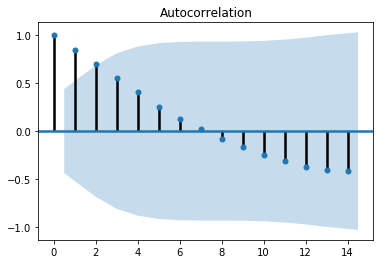

In [17]:
x = plot_acf(total_cases)

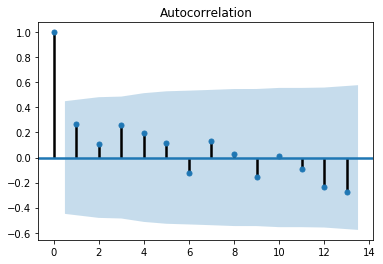

In [18]:
x = plot_acf(np.diff(total_cases))

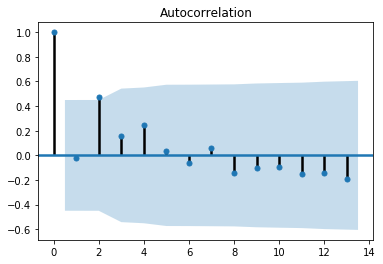

In [19]:
x = plot_acf(daily_percentage_increase)

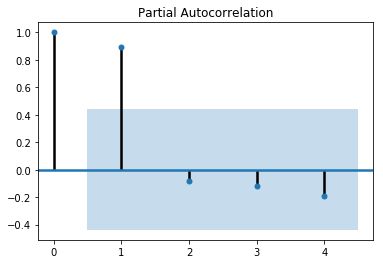

In [28]:
x = plot_pacf(total_cases, lags = np.arange(len(dates)/4)) #error due to sqrt? normalized?  

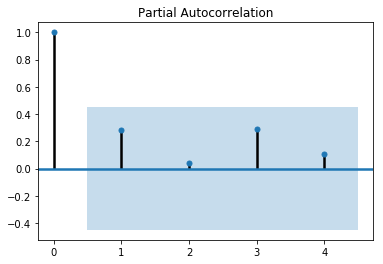

In [29]:
x = plot_pacf(np.diff(total_cases), lags = np.arange(len(dates)/4))

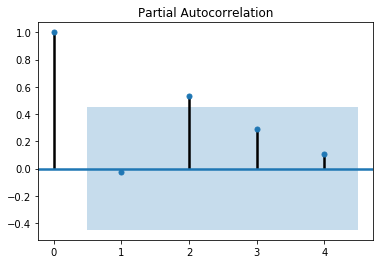

In [30]:
x = plot_pacf(daily_percentage_increase, lags = np.arange(len(dates)/4))